<a href="https://colab.research.google.com/github/hy05sprsea/KIKAGAKU-Tutorial/blob/master/KIKAGAKU_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92(%E5%88%86%E9%A1%9E).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **決定木**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [4]:
dataset = load_iris()

In [5]:
columns_name = dataset.feature_names
x = dataset.data
t = dataset.target

In [6]:
df = pd.DataFrame(data=x, columns=columns_name)
df['Target'] = t

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [7]:
np.unique(t)

array([0, 1, 2])

In [8]:
x.shape, t.shape

((150, 4), (150,))

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

In [11]:
dtree.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

正解率

In [12]:
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test))

train score :  1.0
test score :  0.9777777777777777


In [13]:
dtree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [14]:
t_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [17]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

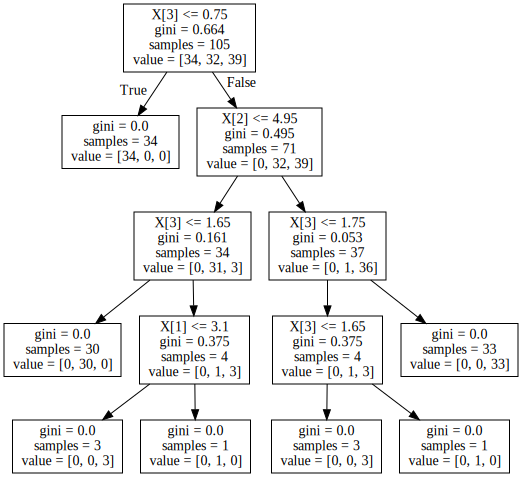

In [19]:
# 木構造の書き出し
graph_tree = graphviz.Source(dot_data)
graph_tree

In [20]:
# それぞれの入力変数の影響度を確認
feature_importance = dtree.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

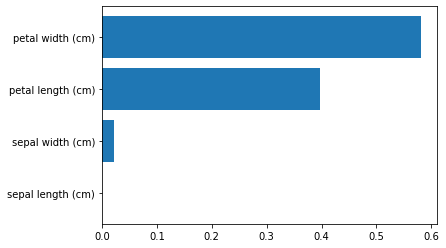

In [24]:
# 可視化
y = columns_name
width = feature_importance

# 横向きで表示
plt.barh(y=y, width=width);

# **サポートベクトルマシン(SVM)**
サポートベクトルマシンは、2 つのカテゴリを識別する分類器

境界線に最も近いサンプルとの距離（マージン）が最大となるように境界線が定義される

In [25]:
from sklearn.svm import SVC
svc = SVC()

In [26]:
svc.fit(x_train, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777


In [28]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [29]:
# 標準化を行うためにデータセットの平均と標準偏差を算出
std_scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
# 標準化
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [31]:
round(x_train_std.mean())

0.0

In [32]:
round(x_train_std.std())

1.0

In [33]:
round(x_test_std.mean())

-0.0

In [34]:
round(x_test_std.std())


1.0

In [35]:
# 標準化したデータでモデルの定義
svc_std = SVC()

In [36]:
svc_std.fit(x_train_std, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

print('train score scaling : ', svc_std.score(x_train_std, t_train))
print('test score scaling : ', svc_std.score(x_test_std, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777
train score scaling :  0.9714285714285714
test score scaling :  0.9777777777777777


# **ロジスティック回帰**
データがカテゴリに属する確率を予測するための回帰のアルゴリズム

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)

In [41]:
log_reg.fit(x_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# モデルの検証
print('train score : ', log_reg.score(x_train, t_train))
print('test score : ', log_reg.score(x_test, t_test))

train score :  0.9809523809523809
test score :  0.9777777777777777


In [43]:
log_reg.coef_.shape

(3, 4)

In [44]:
# 重み
log_reg.coef_

array([[-0.39765327,  0.8342231 , -2.28943702, -0.97842682],
       [ 0.5445833 , -0.29081813, -0.23264797, -0.65833762],
       [-0.14693003, -0.54340497,  2.52208499,  1.63676445]])

In [49]:
len(log_reg.coef_)

3

In [50]:
range(len(log_reg.coef_))

range(0, 3)

In [46]:
log_reg.intercept_

array([  8.99755733,   1.54386287, -10.5414202 ])

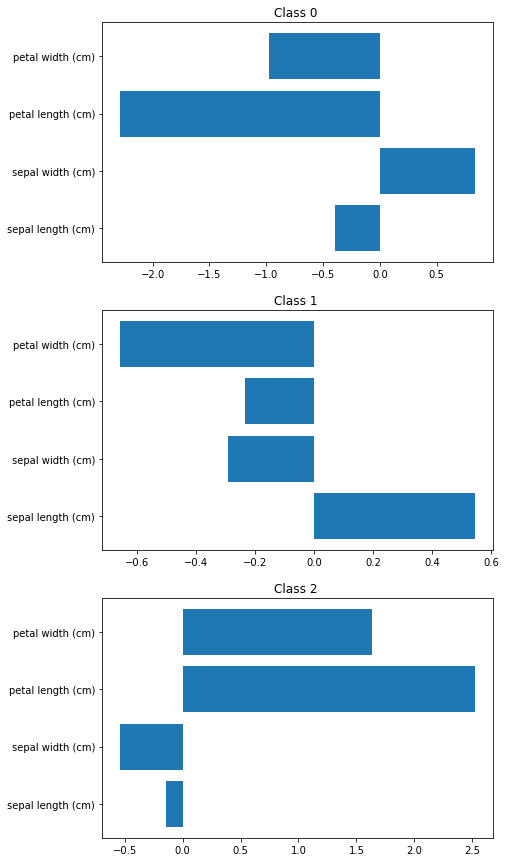

In [47]:
# それぞれの重みを確認
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    ax.barh(y=dataset.feature_names, width=log_reg.coef_[i])
    ax.set_title('Class {} '.format(i))

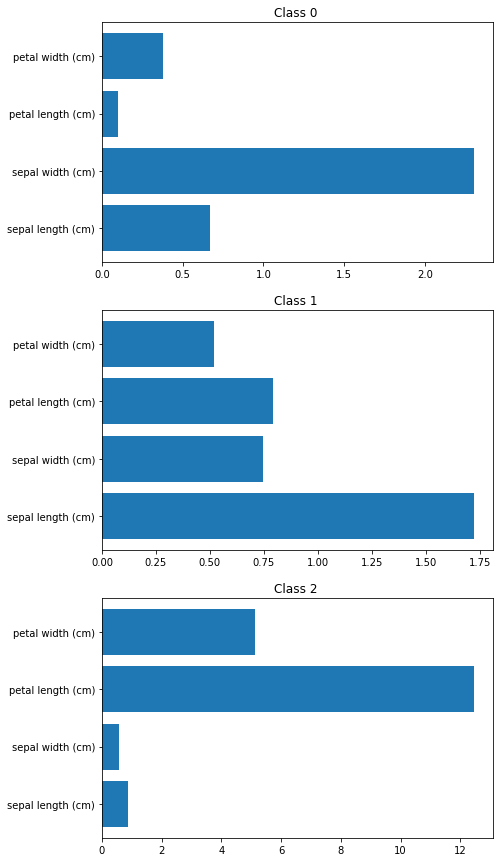

In [51]:
# 各オッズ比を確認
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    odds_ratio = np.exp(log_reg.coef_[i])
    ax.barh(y=dataset.feature_names, width=odds_ratio)
    ax.set_title('Class {} '.format(i))

In [52]:
# カテゴリ 0 の場合
print('重み(係数):',log_reg.coef_[0])
print('オッズ比:',  np.exp(log_reg.coef_[0]))

重み(係数): [-0.39765327  0.8342231  -2.28943702 -0.97842682]
オッズ比: [0.67189495 2.30302414 0.10132349 0.37590199]


In [53]:
log_reg.predict([x_test[0]])

array([2])

In [54]:
# 各カテゴリに対する確率の確認
log_reg.predict_proba([x_test[0]])


array([[1.31706500e-04, 5.98487863e-02, 9.40019507e-01]])

## **評価指標を確認**

In [55]:
df = pd.read_csv('classification_imb.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,Target
0,0,2,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.2,-1.000000,10,1,-1,0,0,11,1,1,0,1,3,2,0.424264,1.048415,0.434971,3.464102,0.5,0.7,0.2,0,2,10,1,10,1,8,4,4,3,9,0,1,1,0,1,0,1
1,1,3,8,0,0,1,0,0,0,0,0,0,0,0,13,0,1,0,0.4,0.7,1.401116,10,1,-1,0,1,1,1,1,0,1,74,3,0.374166,0.716511,0.386135,3.162278,0.7,0.6,0.5,1,0,9,1,10,1,10,7,3,3,8,0,1,1,1,1,0,1
2,2,1,1,1,0,0,0,0,1,0,0,0,0,0,3,0,0,1,0.6,0.7,1.348610,6,1,-1,0,0,0,1,1,0,1,34,2,0.400000,0.804109,0.378021,3.316625,0.8,0.0,0.4,2,2,9,4,9,1,3,4,1,2,8,0,1,1,1,0,0,1
3,5,1,9,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.2,0.3,-1.000000,5,1,0,0,1,1,1,1,2,1,65,3,0.316228,0.393385,0.293258,0.000000,0.0,0.2,0.6,2,2,9,1,7,0,9,5,1,3,8,0,1,1,0,0,0,1
4,0,1,2,0,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.1,0.1,-1.000000,11,1,0,0,0,0,1,1,2,1,39,1,0.316070,0.622063,-1.000000,2.645751,0.5,0.8,0.9,2,2,9,4,9,1,7,4,0,3,6,0,1,0,1,0,1,1


In [56]:
df.shape

(29760, 58)

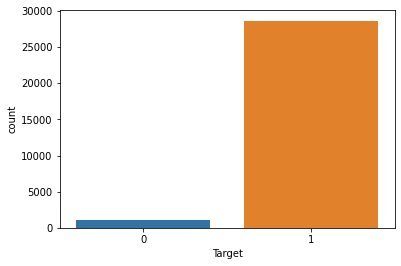

In [57]:
sns.countplot(x='Target', data=df);

In [59]:
# 入力変数を目的変数の切り分け
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape, t.shape)

(29760, 57) (29760,)


In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [61]:
log_reg = LogisticRegression()

**Accuracy**

In [62]:
log_reg.fit(x_train, t_train)

print(log_reg.score(x_train, t_train))
print(log_reg.score(x_test, t_test))

0.9632776497695853
0.961581541218638


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
# 予測値
y_predict = log_reg.predict(x_test)

In [64]:
np.unique(y_predict)

array([1])

In [65]:
np.unique(t_test, return_counts=True)

(array([0, 1]), array([ 343, 8585]))

**混同行列**

In [66]:
from sklearn import metrics

In [67]:
# ラベルの取り出し
labels = list(np.unique(t_train))
labels

[0, 1]

In [68]:
# 混同行列の表示
confusion_matrix = metrics.confusion_matrix(t_test, y_predict)
confusion_matrix

array([[   0,  343],
       [   0, 8585]])

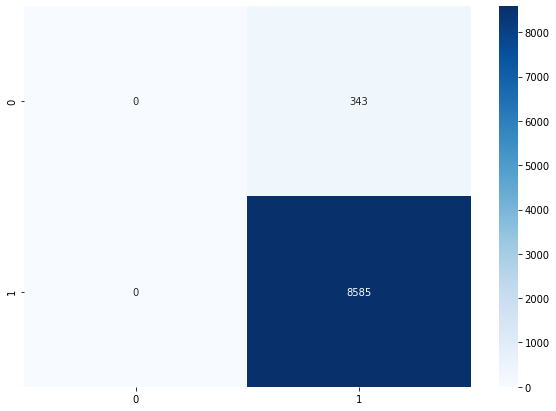

In [70]:
# ヒートマップで可視化
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap='Blues');

**適合率(Precision)・・・予測から実際を見る**

**正例と予測したもののうち、本当に正しく診断できた数の割合**

In [72]:
precision = metrics.precision_score(t_test, y_predict, average=None)
precision

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.96158154])

**↑正例がラベル 1 のときにラベル 1 と予測した内の約 4% が間違っている**

**Recall（再現率）・・・実際から予測を見る**

**実際の状態が正例のうち、どの程度正例であると予測できた数の割合**

In [74]:
recall = metrics.recall_score(t_test, y_predict, average=None)
recall

array([0., 1.])

↑正例がラベル 1 のとき、目標値がラベル 1 のデータを正しく全て予測できているため値が 1 **となっている**

F1 score（F **値）**

In [75]:
f1_score = metrics.f1_score(t_test, y_predict, average=None)
f1_score

array([0.        , 0.98041455])

In [76]:
precision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_test, y_predict)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


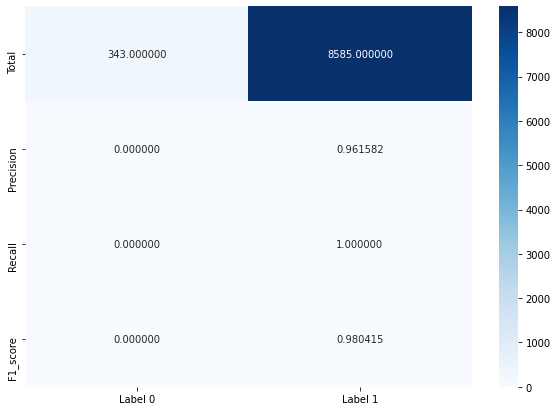

In [78]:
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]),
    index=['Total', 'Precision', 'Recall', 'F1_score'],
    columns=['Label 0', 'Label 1']
)

plt.figure(figsize=(10, 7))
sns.heatmap(df_total, annot=True, fmt='.6f', cmap='Blues');